### Install Quandl

In [123]:
!pip install quandl

# Import Libraries & Data

In [124]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [125]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline 

In [126]:
# Define path

path = r'C:/Users/mrtak/10-2023 City Bike Analysis/'

In [127]:
#import citibikes data

citi = pd.read_csv(r'C:/Users/mrtak/10-2023 City Bike Analysis/city_01.csv')

# Convert Start Time & End Time to Float

In [128]:
citi['start_ride'] = pd.to_datetime(citi['start_of_ride'], errors='coerce')

In [129]:
#create new column with start time as float
start_time = citi['start_ride'].dt.hour + citi['start_ride'].dt.minute/60
start_time

0        18.300000
1        18.633333
2        19.733333
3        11.900000
4        22.016667
           ...    
42986    15.500000
42987    16.450000
42988    17.533333
42989    18.133333
42990    21.900000
Name: start_ride, Length: 42991, dtype: float64

In [130]:
citi['end_ride'] = pd.to_datetime(citi['end_of_ride'], errors='coerce')

In [131]:
#create new column with end time as float
end_time = citi['end_ride'].dt.hour + citi['end_ride'].dt.minute/60
end_time

0        18.583333
1        18.800000
2        19.833333
3        12.050000
4        22.133333
           ...    
42986    15.766667
42987    16.866667
42988    17.866667
42989    18.416667
42990    22.000000
Name: end_ride, Length: 42991, dtype: float64

In [132]:
#create new column trip duration in minutes

trip_duration_min = citi['trip_duration']/60
trip_duration_min

0        16.550000
1         9.683333
2         6.016667
3         9.350000
4         7.116667
           ...    
42986    16.250000
42987    25.683333
42988    19.850000
42989    17.500000
42990     6.166667
Name: trip_duration, Length: 42991, dtype: float64

In [133]:
#add threecolumns

citi['start_of_ride'] = start_time
citi['end_of_ride'] = end_time
citi['trip_duration_min'] = trip_duration_min

In [134]:
citi.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,start_ride,end_ride,trip_duration_min
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,18.300000,18.583333,2013-09-09 18:18:55,2013-09-09 18:35:28,16.550000
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,18.633333,18.800000,2013-09-12 18:38:53,2013-09-12 18:48:34,9.683333
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,19.733333,19.833333,2013-09-18 19:44:04,2013-09-18 19:50:05,6.016667
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,11.900000,12.050000,2013-09-28 11:54:37,2013-09-28 12:03:58,9.350000
4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,22.016667,22.133333,2013-09-27 22:01:01,2013-09-27 22:08:08,7.116667


In [135]:
#save and export dataframe
citi.to_csv(r'C:\Users\mrtak\10-2023 City Bike Analysis\city_04.csv')

In [136]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42991 entries, 0 to 42990
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               42991 non-null  int64         
 1   day_of_week              42991 non-null  object        
 2   start_hour               42991 non-null  int64         
 3   start_station_id         42991 non-null  int64         
 4   start_station_name       42991 non-null  object        
 5   start_station_latitude   42991 non-null  float64       
 6   start_station_longitude  42991 non-null  float64       
 7   end_station_id           42991 non-null  int64         
 8   end_station_name         42991 non-null  object        
 9   end_station_latitude     42991 non-null  float64       
 10  end_station_longitude    42991 non-null  float64       
 11  trip_duration            42991 non-null  int64         
 12  subscriber               42991 n

In [137]:
citi.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,start_of_ride,end_of_ride,start_ride,end_ride,trip_duration_min
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,18.300000,18.583333,2013-09-09 18:18:55,2013-09-09 18:35:28,16.550000
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,18.633333,18.800000,2013-09-12 18:38:53,2013-09-12 18:48:34,9.683333
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,19.733333,19.833333,2013-09-18 19:44:04,2013-09-18 19:50:05,6.016667
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,11.900000,12.050000,2013-09-28 11:54:37,2013-09-28 12:03:58,9.350000
4,5,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,22.016667,22.133333,2013-09-27 22:01:01,2013-09-27 22:08:08,7.116667


# cleaning wrangling subsetting

In [138]:
day_counts = citi.groupby( citi['start_ride'].dt.date)['start_ride'].count()

In [139]:
day_counts

start_ride
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1238
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1227
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
Name: start_ride, dtype: int64

In [144]:
#avg duration trip on day
avg_ride_duration_day = citi.groupby( citi['start_ride'].dt.date)['trip_duration'].mean()

In [145]:
avg_ride_duration_day

start_ride
2013-09-01    835.948586
2013-09-02    751.578735
2013-09-03    762.576951
2013-09-04    788.075178
2013-09-05    782.700348
2013-09-06    770.536137
2013-09-07    828.083817
2013-09-08    836.929519
2013-09-09    795.318763
2013-09-10    754.354800
2013-09-11    728.728418
2013-09-12    744.394718
2013-09-13    756.957084
2013-09-14    788.970906
2013-09-15    811.621971
2013-09-16    746.375744
2013-09-17    742.269602
2013-09-18    757.105294
2013-09-19    745.649327
2013-09-20    757.693303
2013-09-21    781.748166
2013-09-22    806.885816
2013-09-23    757.755299
2013-09-24    742.678819
2013-09-25    778.845146
2013-09-26    733.993111
2013-09-27    772.560853
2013-09-28    816.695260
2013-09-29    785.908778
2013-09-30    751.789316
Name: trip_duration, dtype: float64

In [146]:
result = pd.DataFrame({'date': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': avg_ride_duration_day.values})

In [147]:
result

,date,ride_count,avg_duration
0,2013-09-01,778,835.948586
1,2013-09-02,743,751.578735
2,2013-09-03,1397,762.576951
3,2013-09-04,1543,788.075178
4,2013-09-05,1435,782.700348
5,2013-09-06,1522,770.536137
6,2013-09-07,1205,828.083817
7,2013-09-08,1206,836.929519
8,2013-09-09,1487,795.318763
9,2013-09-10,1646,754.354800


In [148]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          30 non-null     object 
 1   ride_count    30 non-null     int64  
 2   avg_duration  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [149]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,ride_count,avg_duration
datetime,,
2013-09-01,778,835.948586
2013-09-02,743,751.578735
2013-09-03,1397,762.576951
2013-09-04,1543,788.075178
2013-09-05,1435,782.700348


### I selected these data points because it reflects the first month of citi bike. Hopefully, it can look at trends how many rides will occur during 2nd month of the business based on forecast. I also did trip duation in seconds to see if there is anything to play down the line. The primary point of focus are dates of rides and counts of ride per day.

In [150]:
# Reset index so that you can use the "Date" column as a filter

result_2 = result.reset_index()

In [151]:
result_2.head()

,datetime,ride_count,avg_duration
0,2013-09-01,778,835.948586
1,2013-09-02,743,751.578735
2,2013-09-03,1397,762.576951
3,2013-09-04,1543,788.075178
4,2013-09-05,1435,782.700348


In [152]:
result_3 = result_2[['datetime','ride_count']]

In [153]:
result_3

,datetime,ride_count
0,2013-09-01,778
1,2013-09-02,743
2,2013-09-03,1397
3,2013-09-04,1543
4,2013-09-05,1435
5,2013-09-06,1522
6,2013-09-07,1205
7,2013-09-08,1206
8,2013-09-09,1487
9,2013-09-10,1646


In [154]:
# Reset index so that you can use the "Date" column as a filter

result_3 = result.reset_index()

In [155]:
result_3

,datetime,ride_count,avg_duration
0,2013-09-01,778,835.948586
1,2013-09-02,743,751.578735
2,2013-09-03,1397,762.576951
3,2013-09-04,1543,788.075178
4,2013-09-05,1435,782.700348
5,2013-09-06,1522,770.536137
6,2013-09-07,1205,828.083817
7,2013-09-08,1206,836.929519
8,2013-09-09,1487,795.318763
9,2013-09-10,1646,754.354800


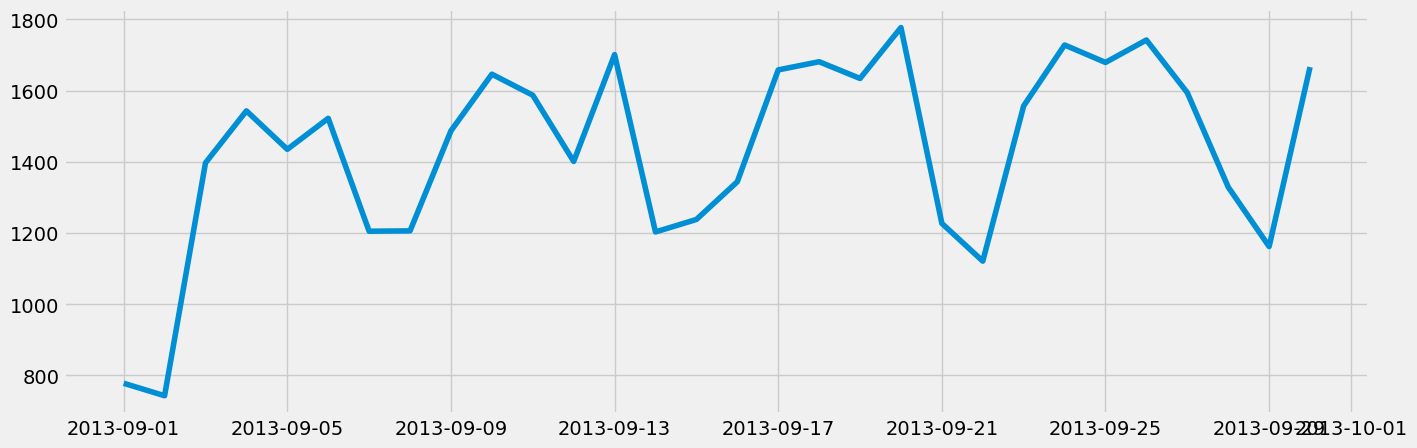

In [156]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(day_counts)

### There seems to be autocorrelation on the ride counts depending on the day of the week

In [157]:
day_counts

start_ride
2013-09-01     778
2013-09-02     743
2013-09-03    1397
2013-09-04    1543
2013-09-05    1435
2013-09-06    1522
2013-09-07    1205
2013-09-08    1206
2013-09-09    1487
2013-09-10    1646
2013-09-11    1587
2013-09-12    1401
2013-09-13    1701
2013-09-14    1203
2013-09-15    1238
2013-09-16    1344
2013-09-17    1658
2013-09-18    1681
2013-09-19    1634
2013-09-20    1777
2013-09-21    1227
2013-09-22    1121
2013-09-23    1557
2013-09-24    1728
2013-09-25    1679
2013-09-26    1742
2013-09-27    1594
2013-09-28    1329
2013-09-29    1162
2013-09-30    1666
Name: start_ride, dtype: int64

In [158]:
# Check for missing values (you shouldn't have any)

day_counts.isnull().sum() 

0

# Time Series Analysis - Decomposition

In [159]:
result

,ride_count,avg_duration
datetime,,
2013-09-01,778,835.948586
2013-09-02,743,751.578735
2013-09-03,1397,762.576951
2013-09-04,1543,788.075178
2013-09-05,1435,782.700348
2013-09-06,1522,770.536137
2013-09-07,1205,828.083817
2013-09-08,1206,836.929519
2013-09-09,1487,795.318763


In [160]:
column_to_drop = 'avg_duration'

In [161]:
result = result.drop(column_to_drop, axis=1)

In [162]:
result

,ride_count
datetime,
2013-09-01,778
2013-09-02,743
2013-09-03,1397
2013-09-04,1543
2013-09-05,1435
2013-09-06,1522
2013-09-07,1205
2013-09-08,1206
2013-09-09,1487


In [163]:
# Reset index so that you can use the "Date" column as a filter

result_1 = result.reset_index()

In [164]:
result_1

,datetime,ride_count
0,2013-09-01,778
1,2013-09-02,743
2,2013-09-03,1397
3,2013-09-04,1543
4,2013-09-05,1435
5,2013-09-06,1522
6,2013-09-07,1205
7,2013-09-08,1206
8,2013-09-09,1487
9,2013-09-10,1646


In [165]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    30 non-null     datetime64[ns]
 1   ride_count  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 612.0 bytes


In [166]:
time_series = result_1['ride_count']

In [167]:
result_1['datetime'] = pd.to_datetime(result_1['datetime'])

In [168]:
result_1.set_index('datetime', inplace=True)

In [169]:
result_1.index.freq = 'D'

In [170]:
time_series = result_1['ride_count']

In [171]:
decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

In [172]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

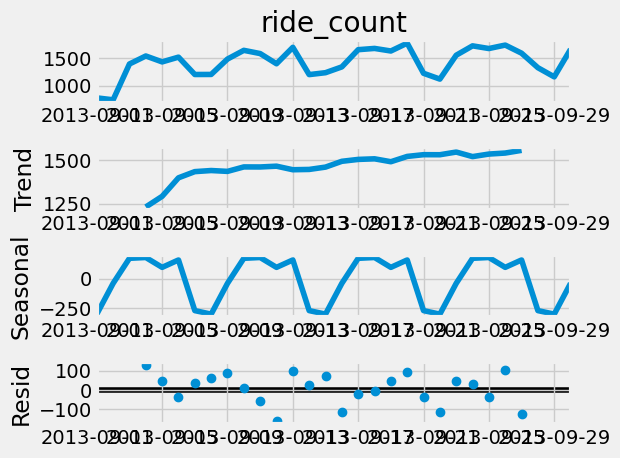

In [173]:
# Plot the separate components

decomposition.plot()
plt.show()

In [174]:
result_1

,ride_count
datetime,
2013-09-01,778
2013-09-02,743
2013-09-03,1397
2013-09-04,1543
2013-09-05,1435
2013-09-06,1522
2013-09-07,1205
2013-09-08,1206
2013-09-09,1487


### The residual level and the trend are different, which requires data needs smoothing

### The trend is increasing, which means there are more riders as month fly by. Since it is Citi Bike's first month in business, that could display the trend.

### Moreover, there is appearance of element of seasonality based on day of the week of each day. It seems ridership is higher on weekdays than weekends. Lastly, there is good amount of noise as well.

# testing for stationarity

In [176]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['ride_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.638977
p-value                         0.005058
Number of Lags Used             6.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64


# The P Value is very significant

### The null hypothesis want to disprove is the presense of unit root. I want to disprove the presence of unit root to ensure the data is stationary. The presense of unit root means data is non-stationary.

### When comparting test statistic to the critical value - the test statistic of the result is way smaller than critical value at 5% and 10% value. Therefore, I have satisfactory p-value.

### Therefore, it doesn't look like performing differencing is necessary.

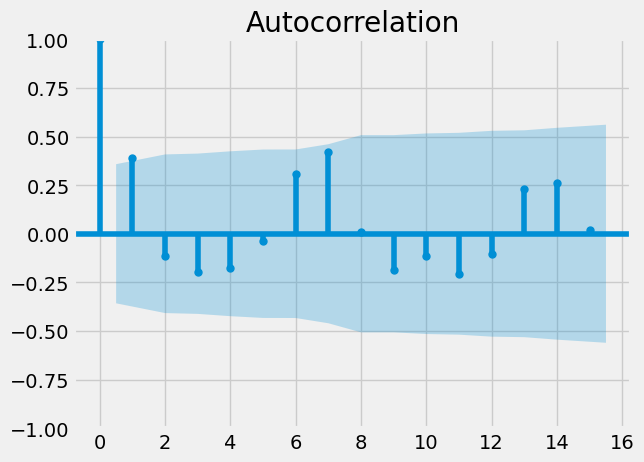

In [177]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

In [178]:
# save files as csv

citi.to_csv(r'C:\Users\mrtak\10-2023 City Bike Analysis\city_05.csv')
result.to_csv(r'C:\Users\mrtak\10-2023 City Bike Analysis\result_01.csv')